In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [18]:
os.getcwd()

'C:\\Users\\Blanka\\Python\\rivers_europe_37253'

In [19]:
new_directory = r'C:\Users\Blanka\Python\rivers_europe_37253'
os.chdir(new_directory)
os.getcwd()

'C:\\Users\\Blanka\\Python\\rivers_europe_37253'

In [42]:
rivers = gpd.read_file(r'C:\Users\Blanka\Python\rivers_europe_37253')

In [47]:
rivers.head(3)

,FID_eu_str,ARCID,FROM_NODE,TO_NODE,FID_subbas,SUB_BAS,MAJ_BAS,MAJ_NAME,SUB_NAME,MAJ_AREA,LEGEND,SUBBAS_ID,TOBAS_ID,RASTERVALU,Strahler,A_Strahler,Regime,RASTERVA_2,geometry
0,0,1,2,3,12628,37027,4037,Volga,Kosva,1474073,37,4037027,4037030,10480,1,8,P,1350.0,"LINESTRING (56.33958 61.69583, 56.33125 61.677..."
1,1,2,1,3,12628,37027,4037,Volga,Kosva,1474073,37,4037027,4037030,17140,1,8,P,1369.0,"LINESTRING (56.32708 61.85417, 56.32708 61.843..."
2,2,3,3,5,12628,37027,4037,Volga,Kosva,1474073,37,4037027,4037030,81810,2,7,P,1340.0,"LINESTRING (56.39375 61.57292, 56.40208 61.556..."


In [44]:
rivers.shape

(40326, 19)

In [45]:
#FROM_NODE: a hálózat minden egyes ívének kiindulási csomópontja
#TO_NODE: a hálózat minden egyes ívének célpontja
#STRAHLER: A hálózat minden egyes ívének Strahler-folyórendje, amely a vízfolyások hierarchiáját jelzi.
#MAJ_BAS és MAJ_NAME: annak a nagymedencének a számkódja és neve, amelybe az ív esik
#MAJ_AREA: annak a nagymedencének a területe négyzetkilométerben, amelybe az ív esik
#SUB_BAS és SUB_NAME: annak a részmedencének a számkódja és neve, amelybe az ív esik
#SUB_AREA: annak a részmedencének a területe négyzetkilométerben, amelybe az ív esik
#TO_SUBBAS: annak a részmedencének a számkódja, amely felé a részmedence folyik, amelybe az ív esik
#a -888 és -999 kódokat a belső részmedencékhez, illetve a tengerbe ömlő részmedencékhez rendelték
#Regime: "P" = évelő, "I" = időszakos patakok

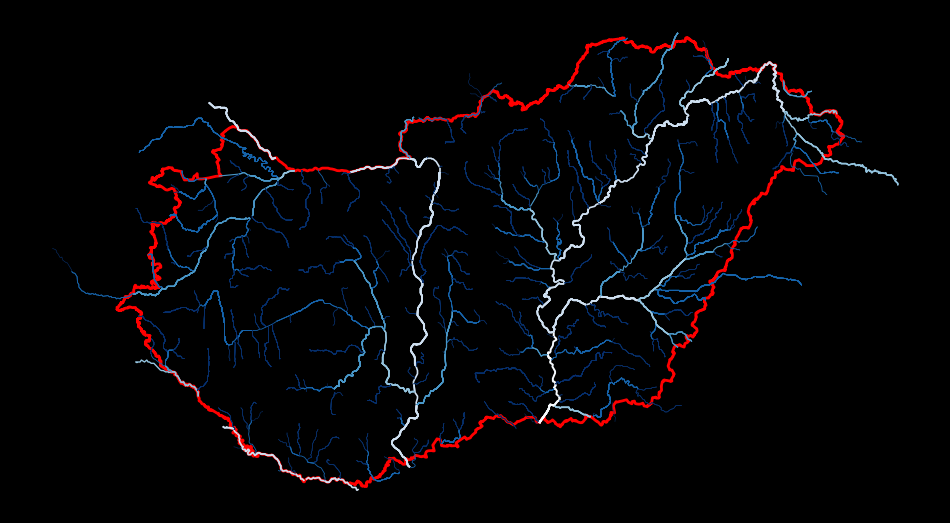

In [65]:
#converting the STRAHLER index into line-width values

# Load the rivers and Hungary boundary data
rivers_in_hungary = gpd.read_file(r'C:\Users\Blanka\Python\rivers_europe_37253\Hungary\hotosm_hun_waterways_lines_shp.shp')
hungary_boundary = gpd.read_file(r'C:\Users\Blanka\Python\rivers_europe_37253\Hungary\hungary_administrative_boundaries_national_polygon.shp')

#print("CRS of europe rivers:", rivers.crs)
#print("CRS of hungary rivers:", rivers_in_hungary.crs)
#CRS of europe rivers: EPSG:4326
#CRS of hungary rivers: EPSG:4326

# Assign CRS to rivers_in_hungary
rivers_in_hungary.crs = rivers.crs

# Spatial join to identify rivers within Hungary
rivers_joined = gpd.sjoin(rivers, rivers_in_hungary, how='inner', predicate='intersects')

# Converting the STRAHLER index into line-width values
rivers_joined['width'] = 10 - rivers_joined['A_Strahler']
rivers_joined['width'] = rivers_joined['width'] / float(5)

# Creating a canvas in Matplotlib
f, ax = plt.subplots(1, 1, figsize=(12, 15))

# Plot Hungary boundary
hungary_boundary.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

# Doing the plotting
rivers_joined.plot(column='A_Strahler', ax=ax, linewidth=rivers_joined['width'], cmap='Blues')


# Editing the plot
f.patch.set_facecolor('k')  # Black background color
ax.axis('off')  # Turn off axis labels
ax.set_facecolor('k')  # Black plot background color

# Saving the visual
plt.savefig('rivers_hungary.png', dpi=200, bbox_inches='tight')